# Summer of Finance 
**Date:** 2025-05-16  
**Author:** Andrew Sutcliffe

Keeping myself occupied during Summer 2025. General repo to track personal work in quant finance, actuarial, or algo-trading.



## Sub-Themes I’ll Explore

Here are the rotating focus areas I plan to work through this summer:

- **Actuarial Finance**: pensions, annuities, mortality models, risk pooling
- **Quantitative Finance**: CAPM, factor models, volatility, portfolio construction
- **Algorithmic Trading**: trading signals, backtesting, alpha research, clustering

Each theme will get at least a few notebooks.


## Today's Work

- Set up this GitHub repo and virtual environment
- Installed necessary libraries
- Created this intro notebook as the official kickoff

Next week I'd like to look into Algo Trading:

Resources:
- Machine Learning for Asset Managers by Marcos López de Prado
- 3 x Ernest P. Chan Books (Especially 'Machine Trading')
- https://www.quantconnect.com/research/

Want to learn what goes into Finance research.

## Working with YFinance:

Initial attempt at getting data.

In [5]:
%pip install yfinance --upgrade --quiet

In [2]:
# Required:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="3y")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  15 of 15 completed


## Backtest Framework:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def backtest_ma_crossover(prices: pd.Series, 
                          short_window: int = 20, 
                          long_window: int = 50, 
                          plot: bool = True) -> pd.DataFrame:
    """
    Backtests a simple moving average crossover strategy.

    Args:
        prices (pd.Series): Daily close prices for one ticker.
        short_window (int): Short moving average window.
        long_window (int): Long moving average window.
        plot (bool): Whether to plot performance.

    Returns:
        pd.DataFrame: DataFrame with price, signals, returns, and strategy performance.
    """
    
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_ma'] = prices.rolling(window=short_window).mean()
    signals['long_ma'] = prices.rolling(window=long_window).mean()
    
    # Generate signals
    signals['signal'] = 0
    signals.loc[signals['short_ma'] > signals['long_ma'], 'signal'] = 1
    signals['signal'] = signals['signal'].shift(1)  # delay signal by 1 day
    
    # Returns
    signals['returns'] = prices.pct_change()
    signals['strategy_returns'] = signals['signal'] * signals['returns']
    signals.dropna(inplace=True)

    # Cumulative returns
    signals['cumulative_strategy'] = (1 + signals['strategy_returns']).cumprod()
    signals['cumulative_benchmark'] = (1 + signals['returns']).cumprod()

    # Optional plot
    if plot:
        plt.figure(figsize=(10,5))
        plt.plot(signals['cumulative_benchmark'], label='Buy & Hold', alpha=0.6)
        plt.plot(signals['cumulative_strategy'], label='MA Crossover Strategy', alpha=0.8)
        plt.title("Cumulative Returns")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return signals


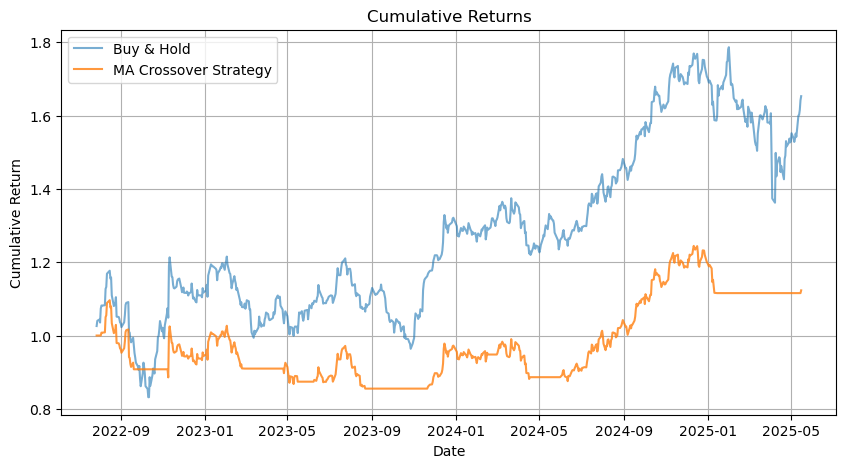

,price,short_ma,long_ma,signal,returns,strategy_returns,cumulative_strategy,cumulative_benchmark
Date,,,,,,,,
2025-05-12,958.030029,906.874506,918.091188,0.0,0.037458,0.000000,1.115738,1.600022
2025-05-13,959.179993,910.336005,918.050331,0.0,0.001200,0.000000,1.115738,1.601942
2025-05-14,967.059998,914.267004,918.459080,0.0,0.008215,0.000000,1.115738,1.615103
2025-05-15,983.080017,920.132004,918.863003,0.0,0.016566,0.000000,1.115738,1.641858
2025-05-16,989.710022,925.828503,919.568604,1.0,0.006744,0.006744,1.123263,1.652931


In [5]:
symbol = "BLK"
prices = ohlc['Close'][symbol]

results = backtest_ma_crossover(prices, short_window=20, long_window=50)
results.tail()
